In [0]:
# install dependencies
!pip install -U torch torchvision cython Pillow==6.2.2
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__
!gcc --version
# opencv is pre-installed on colab

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.14)
Requirement already up-to-date: Pillow==6.2.2 in /usr/local/lib/python3.6/dist-packages (6.2.2)
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-bl7jqh1u
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-bl7jqh1u
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275256 sha256=f146aabf8eb043e55f9ee5e680d2b8cd2096f89d74d8d8f3c56e6ae62c01925f
  Stored in directory: /tmp/pip-ephem-wheel-cache-8jsl9p1u/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycoco

In [0]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Found existing installation: detectron2 0.1
    Can't uninstall 'detectron2'. No files were found to uninstall.
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

--2020-01-15 10:27:56--  https://www.athensguide.com/shopping/ermou-street.jpg
Resolving www.athensguide.com (www.athensguide.com)... 158.106.190.55
Connecting to www.athensguide.com (www.athensguide.com)|158.106.190.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94750 (93K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  92.53K   397KB/s    in 0.2s    

2020-01-15 10:27:57 (397 KB/s) - ‘input.jpg’ saved [94750/94750]



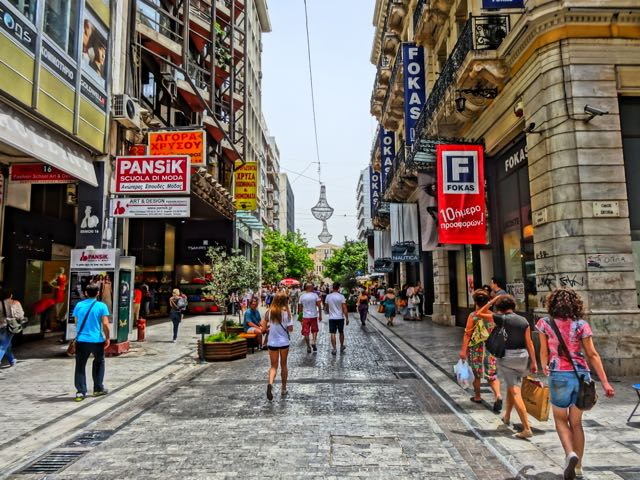

In [0]:
!wget https://www.athensguide.com/shopping/ermou-street.jpg -O input.jpg
im = cv2.imread("./input.jpg")
cv2_imshow(im)

In [0]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can either use the https://dl.fbaipublicfiles.... url, or use the detectron2:// shorthand
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:16, 10.6MB/s]                           


In [0]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[5.3616e+02, 2.8771e+02, 6.1547e+02, 4.7592e+02],
        [7.0557e+01, 2.8126e+02, 1.1253e+02, 3.9937e+02],
        [4.8492e+02, 2.9130e+02, 5.3965e+02, 4.4009e+02],
        [4.5919e+02, 2.8733e+02, 5.0218e+02, 4.1298e+02],
        [2.6126e+02, 2.9606e+02, 2.9418e+02, 4.0318e+02],
        [3.2413e+02, 2.8209e+02, 3.4966e+02, 3.5741e+02],
        [1.6786e+02, 2.8709e+02, 1.8785e+02, 3.4085e+02],
        [2.9692e+02, 2.7994e+02, 3.2160e+02, 3.5548e+02],
        [3.5612e+02, 2.8704e+02, 3.6996e+02, 3.2803e+02],
        [2.4298e+02, 2.9924e+02, 2.6507e+02, 3.5140e+02],
        [3.8034e+02, 2.8958e+02, 3.9666e+02, 3.2617e+02],
        [5.8751e-01, 2.8811e+02, 2.6468e+01, 3.7061e+02],
        [5.4628e+02, 3.1690e+02, 5.9638e+02, 4.0481e+02],
        [6.9171e+01, 2.9890e+02, 9.6975e+01, 3.5641e+02],
        [2.7997e+02, 2.7791e+02, 3.0006e+02, 2.8534e+02],
        [1.9791e+02, 3.3051e+02, 2.4906e+02, 3.6159e+02],
        [4.5345e+02, 3.5859e+02, 4.7333e+02, 3.8663e+02],
        

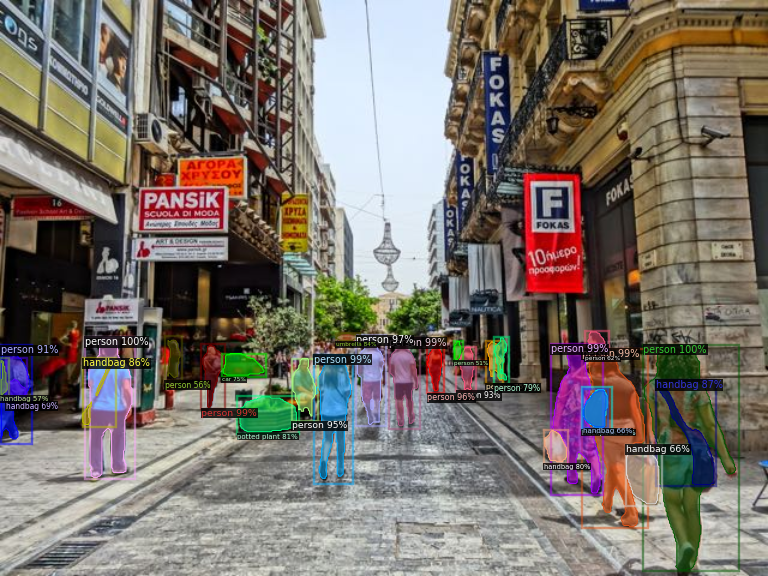

In [0]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

model_final_a6e10b.pkl: 237MB [00:21, 10.9MB/s]                           


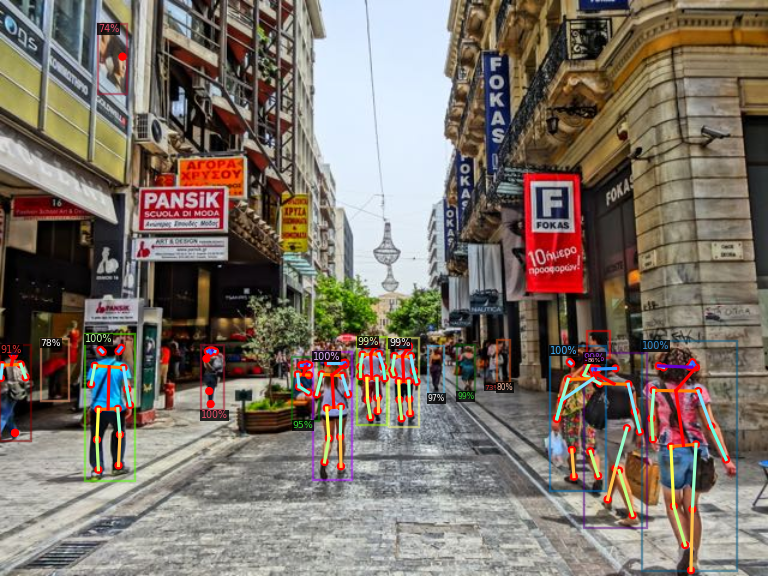

In [0]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

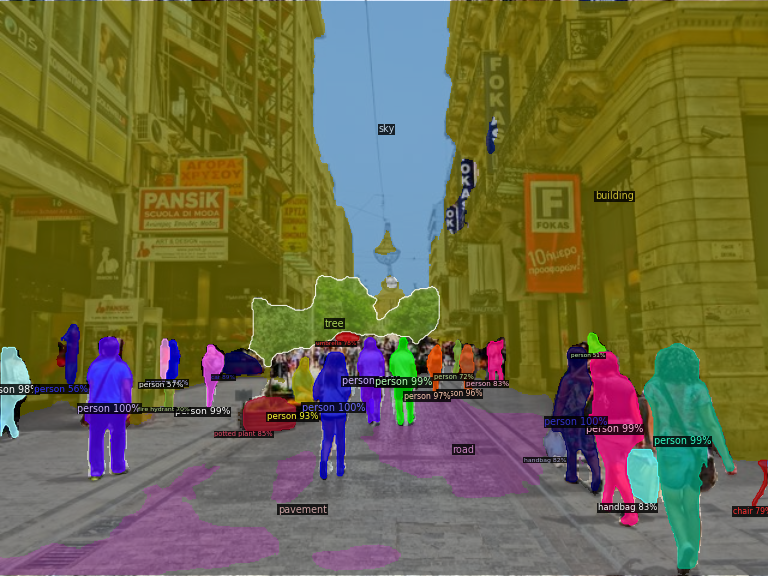

In [0]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = "detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl"
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
!ls


detectron2_repo  input.jpg  sample_data


In [0]:
!rm video-output.mkv

In [0]:
# Install dependencies, download the video, and crop 5 seconds for processing
!pip install youtube-dl
!pip uninstall -y opencv-python opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=KBgfbxgD22U -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:02:56 -c:v copy video-clip.mp4

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
[youtube] KBgfbxgD22U: Downloading webpage
[youtube] KBgfbxgD22U: Downloading video info webpage
[download] Destination: video.mp4
[download] 100% of 194.48MiB in 00:05
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable

In [0]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes)
# Using a model trained on COCO dataset =>http://cocodataset.org/#home
!cd detectron2_repo && python demo/demo.py --config-file configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml --video-input ../video-clip.mp4 --confidence-threshold 0.6 --output ../video-output.mkv \
  --opts MODEL.WEIGHTS detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl

Failed to load OpenCL runtime
[01/15 10:39:05 detectron2]: Arguments: Namespace(confidence_threshold=0.6, config_file='configs/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl'], output='../video-output.mkv', video_input='../video-clip.mp4', webcam=False)
100% 5280/5281 [2:03:59<00:01,  1.41s/it]


In [0]:
ls

detectron2_repo/  sample_data/    video.mp4
input.jpg         video-clip.mp4  video-output.mkv


In [0]:
# Download the results
from google.colab import files
files.download('video-output.mkv')
#You can see the output video here => https://www.youtube.com/watch?v=kMTt5vgXQ4k&feature=youtu.be

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 59884, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

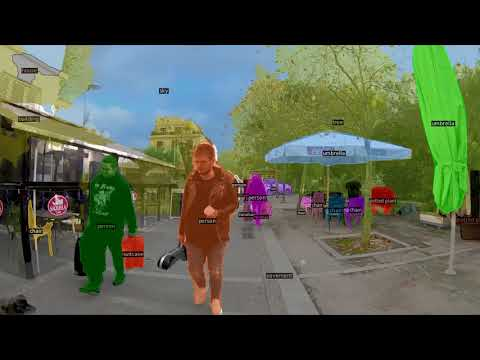

In [37]:
from IPython.display import YouTubeVideo
YouTubeVideo('kMTt5vgXQ4k')